## **MÉTODOS DE ENSAMBLE**

Continuaremos con la última de las técnicas de ensamble. En esta práctica veremos **voting**.

- - -

## **`VOTING`**

Con esta técnica, podemos entrenar varios modelos con los mismos datos. Cuando tengamos datos nuevos, obtendremos una predicción de cada modelo. Cada modelo tendrá asociado un voto. De esta forma, propondremos como predicción final lo que voten la mayoría de los modelos.

Hay otra forma de combinar las votaciones. Cuando los modelos dan una probabilidad, podemos usar el «voto suave» (soft-voting). En el voto suave, se le da más importancia a los resultados en los que algún modelo esté muy seguro. Es decir, cuando la predicción está muy cercana a la probabilidad 0 o 1, se le da más peso a la predicción de ese modelo.

Cuando usamos modelos diferentes, los errores se compensan y la predicción combinada generaliza mejor. Por eso, no tiene sentido hacer un ensamble de votación por mayoría con el mismo tipo de modelo. Por ejemplo, si entrenamos 3 árboles de decisión con los mismos datos y combinamos sus resultados con votación por mayoría, vamos a obtener los mismos resultados que si usáramos un solo árbol. En ese caso, para poder combinar muchos árboles de decisión deberíamos usar **bagging**.

<img src = "https://www.iartificial.net/wp-content/uploads/2019/05/ensemble-votacion.jpg" height = 250>

- - -

## `Práctica`

Trabajaremos con el siguiente [dataset](https://www.kaggle.com/datasets/itsmesunil/bank-loan-modelling).

In [4]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
#import sys
#!{sys.executable} -m pip install openpyxl


In [5]:
# Cargamos los datos

bank_data = pd.read_excel('../Datasets/Clase_08_Bank_Personal_Loan_Modelling.xlsx', sheet_name='Data')

In [6]:
bank_data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


### Procedemos a hacer un breve EDA

In [7]:
# Descartamos columnas

bank_data = bank_data.drop(['ID', 'Experience', 'ZIP Code', 'CCAvg', 'Personal Loan'], axis=1)

In [8]:
bank_data.describe()

,Age,Income,Family,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,73.774200,2.396400,1.881000,56.498800,0.104400,0.06040,0.596800,0.294000
std,11.463166,46.033729,1.147663,0.839869,101.713802,0.305809,0.23825,0.490589,0.455637
min,23.000000,8.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,39.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,64.000000,2.000000,2.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,98.000000,3.000000,3.000000,101.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,224.000000,4.000000,3.000000,635.000000,1.000000,1.00000,1.000000,1.000000


Text(0, 0.5, 'Age')

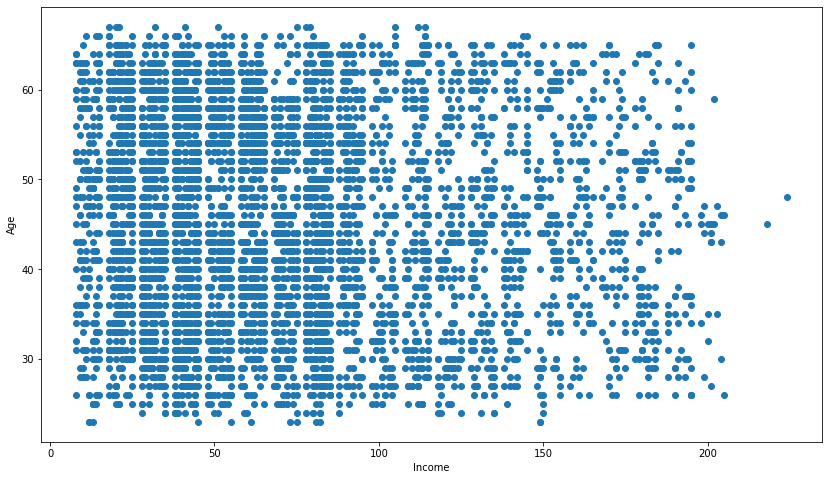

In [9]:
# Ploteamos un gráfico de dispersión

fig, ax = plt.subplots(figsize=(14, 8))

plt.scatter( bank_data['Income'], bank_data['Age'])

plt.xlabel('Income')
plt.ylabel('Age')

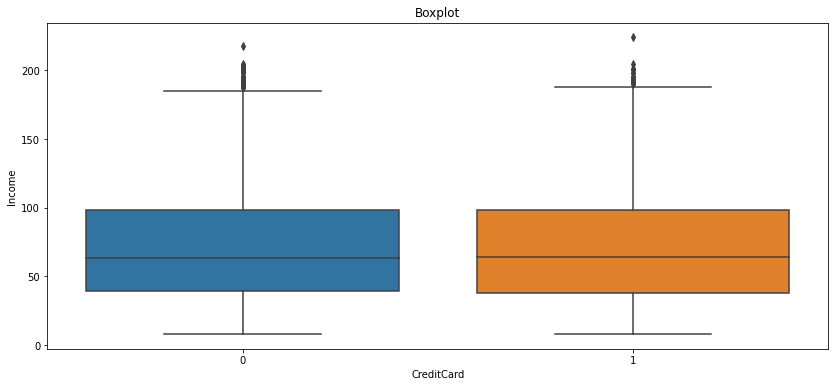

In [10]:
# Detectamos outliers

fig, ax = plt.subplots(figsize=(14, 6))

sns.boxplot(x = bank_data['CreditCard'], y = bank_data['Income'])

plt.title('Boxplot')

plt.show()

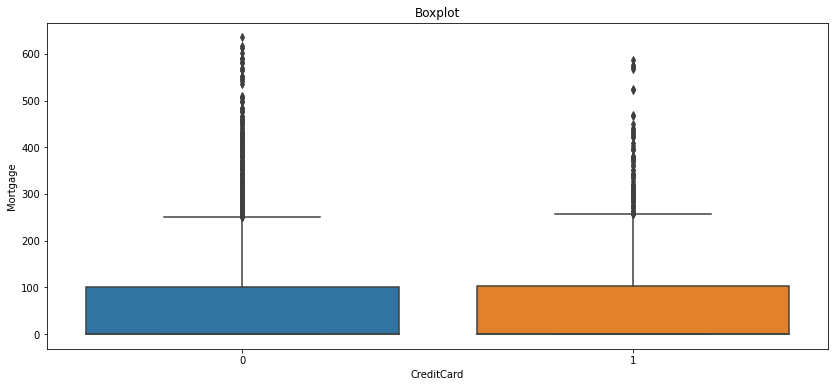

In [11]:
fig, ax = plt.subplots(figsize=(14, 6))

sns.boxplot(x = bank_data['CreditCard'], y = bank_data['Mortgage'])

plt.title('Boxplot')

plt.show()

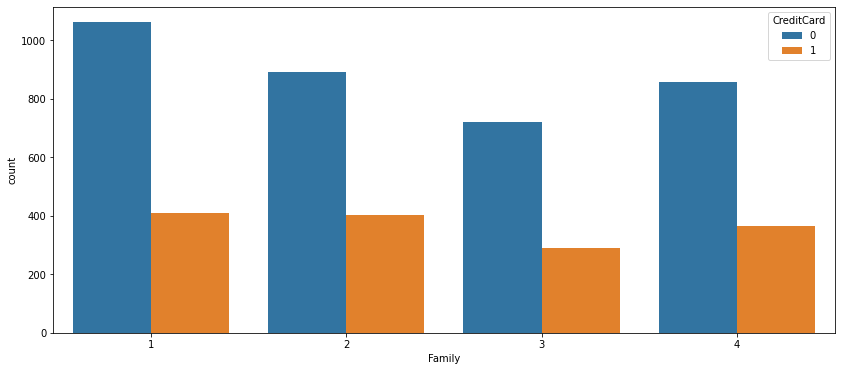

In [12]:
plt.figure(figsize=(14, 6))

sns.countplot(x='Family', data = bank_data, hue = 'CreditCard')

plt.show()

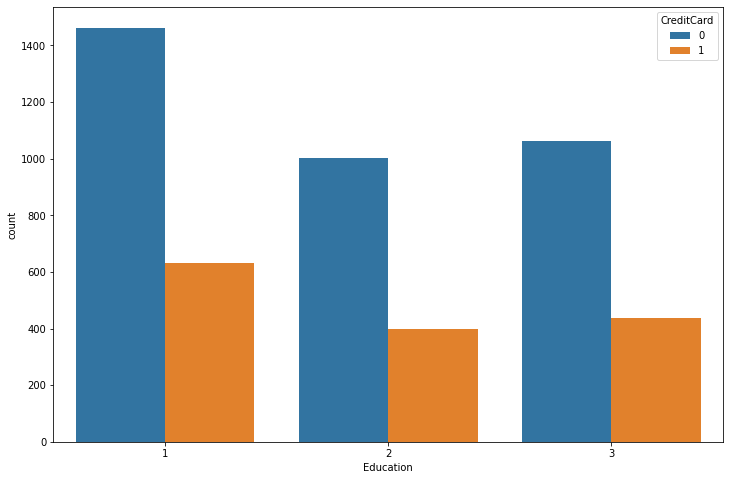

In [13]:
plt.figure(figsize=(12, 8))

sns.countplot(x='Education', data = bank_data, hue='CreditCard')

plt.show()

In [14]:
# Correlacionamos

pd.crosstab(bank_data['Securities Account'], bank_data['CreditCard'])

CreditCard,0,1
Securities Account,,
0,3151,1327
1,379,143


In [15]:
bank_data_corr = bank_data.corr()

bank_data_corr

,Age,Income,Family,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Age,1.000000,-0.055269,-0.046418,0.041334,-0.012539,-0.000436,0.008043,0.013702,0.007681
Income,-0.055269,1.000000,-0.157501,-0.187524,0.206806,-0.002616,0.169738,0.014206,-0.002385
Family,-0.046418,-0.157501,1.000000,0.064929,-0.020445,0.019994,0.014110,0.010354,0.011588
Education,0.041334,-0.187524,0.064929,1.000000,-0.033327,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,0.206806,-0.020445,-0.033327,1.000000,-0.005411,0.089311,-0.005995,-0.007231
Securities Account,-0.000436,-0.002616,0.019994,-0.010812,-0.005411,1.000000,0.317034,0.012627,-0.015028
CD Account,0.008043,0.169738,0.014110,0.013934,0.089311,0.317034,1.000000,0.175880,0.278644
Online,0.013702,0.014206,0.010354,-0.015004,-0.005995,0.012627,0.175880,1.000000,0.004210
CreditCard,0.007681,-0.002385,0.011588,-0.011014,-0.007231,-0.015028,0.278644,0.004210,1.000000


<AxesSubplot:>

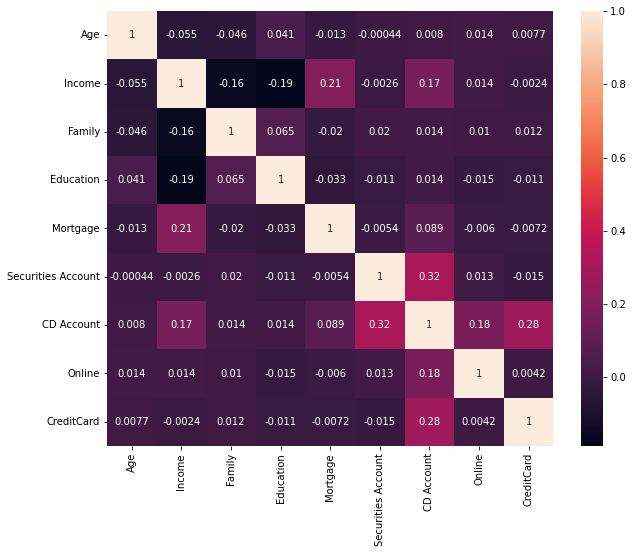

In [16]:
# Hacemos un mapa de calor para ver la relación entre las variables de una manera más amena

plt.figure(figsize=(10, 8))

sns.heatmap(bank_data_corr, annot=True)

### **Machine learning**

In [17]:
# Definimos atributos y variable a predecir

X = bank_data.drop('CreditCard', axis=1)

Y = bank_data['CreditCard']

In [18]:
# Separamos los datos

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [19]:
from sklearn.ensemble import VotingClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [20]:
# Instanciamos 3 modelos

log_clf = LogisticRegression(C=1, solver='liblinear')

svc_clf = SVC(C=1, kernel='linear', gamma='auto')

naive_clf = GaussianNB()

In [21]:
# Los entrenamos, predecimos y evaluamos
import time

comienzo = time.time()
for clf in (log_clf, svc_clf, naive_clf):
    
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))
    
fin = time.time() - comienzo

print(f'Tardó {round(fin)} segundos')

LogisticRegression 0.747
SVC 0.747
GaussianNB 0.747


**Hard voting**

In [22]:
voting_clf_hard = VotingClassifier(estimators=[('lr', log_clf), 
                                               ('svc', svc_clf), 
                                               ('naive', naive_clf)],
                                   voting='hard')

In [23]:
# Obtenemos los estimadores

voting_clf_hard.estimators

[('lr', LogisticRegression(C=1, solver='liblinear')),
 ('svc', SVC(C=1, gamma='auto', kernel='linear')),
 ('naive', GaussianNB())]

In [24]:
# Entrenamos

voting_clf_hard.fit(x_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1, solver='liblinear')),
                             ('svc', SVC(C=1, gamma='auto', kernel='linear')),
                             ('naive', GaussianNB())])

In [25]:
# Predecimos

y_pred = voting_clf_hard.predict(x_test)

In [26]:
# Evaluamos

print('Accuracy en test:', accuracy_score(y_test, y_pred))

Accuracy en test: 0.747


In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.98      0.85       714
           1       0.76      0.17      0.28       286

    accuracy                           0.75      1000
   macro avg       0.75      0.57      0.56      1000
weighted avg       0.75      0.75      0.68      1000



In [28]:
print(confusion_matrix(y_test, y_pred))

[[699  15]
 [238  48]]


In [29]:
# Visualizamos cuál de los tres modelos obtuvo el mejor 'voto'

for clf_hard in (log_clf, svc_clf, naive_clf, voting_clf_hard):
    
    clf_hard.fit(x_train, y_train)
    y_pred = clf_hard.predict(x_test)
    
    print(clf_hard.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.747
SVC 0.747
GaussianNB 0.747
VotingClassifier 0.747


**Soft voting**

In [30]:
# Debemos fijar probability en True para poder hacer posteriormente la predicción
svc_clf = SVC(C=1, kernel='linear', gamma='auto', probability=True)

In [31]:
voting_clf_soft = VotingClassifier(estimators=[('lr', log_clf), 
                                               ('svc', svc_clf), 
                                               ('naive', naive_clf)],
                                   voting='soft')

In [32]:
# Entrenamos

comienzo = time.time()

voting_clf_soft.fit(x_train, y_train)

fin = time.time() - comienzo

print(f'Tardó {round(fin)} segundos')

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1, solver='liblinear')),
                             ('svc',
                              SVC(C=1, gamma='auto', kernel='linear',
                                  probability=True)),
                             ('naive', GaussianNB())],
                 voting='soft')

In [33]:
# Predecimos

y_pred = voting_clf_soft.predict(x_test)

In [34]:
# Evaluamos

print('Accuracy en test:', accuracy_score(y_test, y_pred))

Accuracy en test: 0.747


In [35]:
# Visualizamos cuál de los tres modelos obtuvo el mejor 'voto'

comienzo = time.time()

for clf_hard in (log_clf, svc_clf, naive_clf, voting_clf_hard):
    
    clf_hard.fit(x_train, y_train)
    y_pred = clf_hard.predict(x_test)
    
    print(clf_hard.__class__.__name__, accuracy_score(y_test, y_pred))

fin = time.time() - comienzo

print(f'Tardó {round(fin)} segundos')

LogisticRegression 0.747
SVC 0.747
GaussianNB 0.747
VotingClassifier 0.747


- - -